# Module 6 - THE LAST ONE

## Challenge I (partie 1) :

Dans la première partie du premier challenge (issu du notebook 06_02), il est simplement question de tester quelques générateurs de nombres aléatoires de la bibliothèque de python et de vérifier s'ils donnent des résultats semblables à ceux présentés dans le notebook.
Nous allons tester 2 méthodes différentes : 1) la fonction 'random.uniform' et 2) la fonction 'randint'. Pour chacune d'entre elles nous allons reproduire la distribution exponentielle selon la méthode d'inversement de la fonction cumulative, et la distribution gaussienne avec la méthode de réjection de Neumann.

Avant toute chose, implémentons les packages habituels nécessaires pour les 2 parties et recopions les exemples du notebook utilisant 'numpy.random.random_sample' comme générateur aléatoire. Nous pourrons ainsi comparer nos résultats obtenus avec les exemples.

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#### Distribution exponentielle aléatoire :

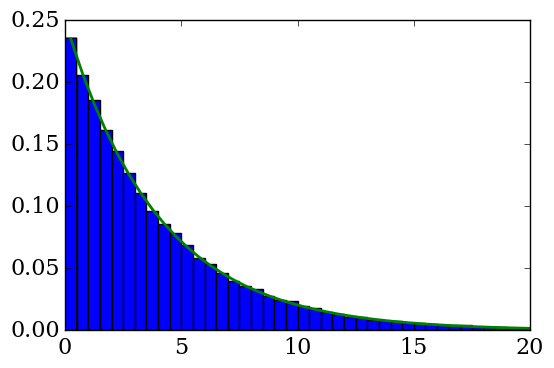

In [2]:
alpha = 0.25                                        # cfr notebook
n = 100000
x = numpy.random.random_sample(n)
y = -1/alpha*numpy.log(1-x)

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


#### Distribution gaussienne aléatoire (méthode 1) :

Size of accepted set h and expected size 1/K: 71647 71428.57142857143


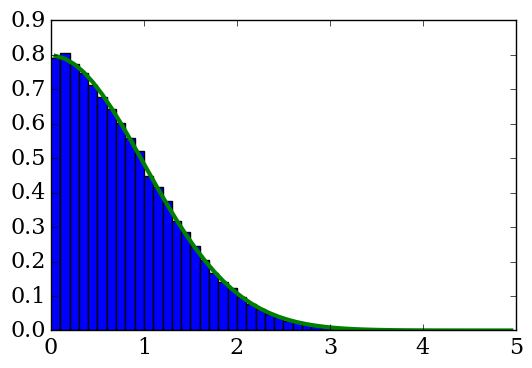

In [3]:
N = 100000                                        # cfr notebook
K = 1.4
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    u2 = numpy.random.random_sample()
    
    g = numpy.log(1/(1-u1))
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
        
    if (u2<ratio):
        h.append(g)

print("Size of accepted set h and expected size 1/K:", len(h), N/K)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


### 1) Avec random.uniform

Cette fonction crée un nombre réel pseudo-aléatoire entre deux bornes précisées. Il nous faut d'abord l'importer :

In [4]:
import random
from random import uniform

#### Distribution exponentielle aléatoire :

La différence avec l'exemple est qu'on ne peut ici créer qu'un seul nombre à chaque fois. On va donc utiliser un tableau de n cases et y placer n nombres pseudo-aléatoires.

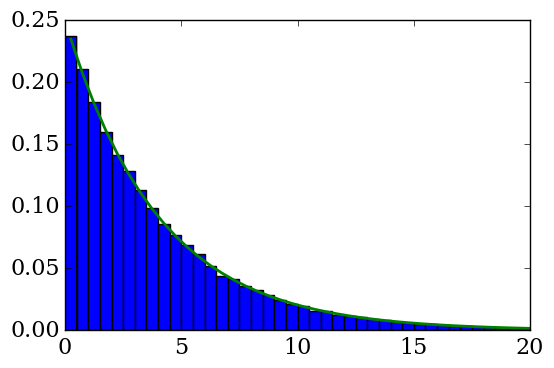

In [5]:
#alpha, n sont définis dans l'exemple

x = numpy.zeros(n)          # On crée un tableau à n cases

for i in range(n):          # On le remplit de n nombres pseudo-aléatoires
    t = random.uniform(0,1)
    x[i] = t
    
y = -1/alpha*numpy.log(1-x) # On calcule la fonction cumulative inverse en utilisant le tableau x

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


Cela fonctionne bien.

#### Distribution gaussienne aléatoire : 

C'est encore plus simple ici puisqu'on n'a pas besoin de tout un tableau. On remarque en effet que 'numpy.random.random_sample()' est équivalente à 'random.uniform(0,1)' pour un seul argument.

Size of accepted set h and expected size 1/K: 71504 71428.57142857143


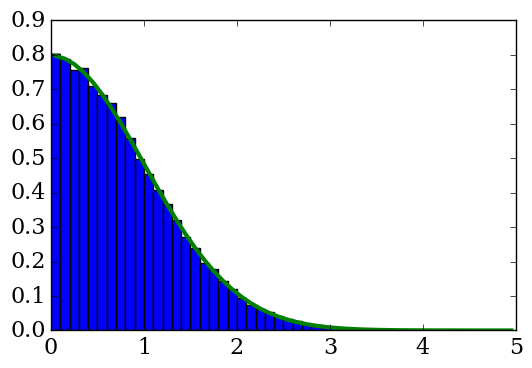

In [6]:
# N, K, sont définis dans l'exemple

h=[] # On doit recréer h par contre sinon il reste rempli avec les valeurs de l'exemple
     # On aurait pu simplement utiliser une autre lettre mais la comparaison est meilleure en gardant 
     # les mêmes lettres

for i in range(N):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    
    g = numpy.log(1/(1-u1))
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
        
    if (u2<ratio):
        h.append(g)

print("Size of accepted set h and expected size 1/K:", len(h), N/K)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

On obtient bien une gaussienne similaire, ainsi que des valeurs similaires de la longueur de h et de N/K.

### 2) Avec randint :

Comme autre générateur d'aléatoire, on va tester 'randint' qui renvoie cette fois un entier entre 2 bornes qu'on lui donne. Pour rester le plus aléatoire possible, on va définir les bornes entre 0 et n (n valait 100000 dans les autres exemples) et puis normaliser en redivisant par n. 

#### Distribution exponentielle aléatoire :

L'algorithme utilisé est strictement le même qu'avec random.uniform.

[ 0.67656322  1.88603505  6.39260736 ...,  0.76895427  6.5363571
  3.60186639]


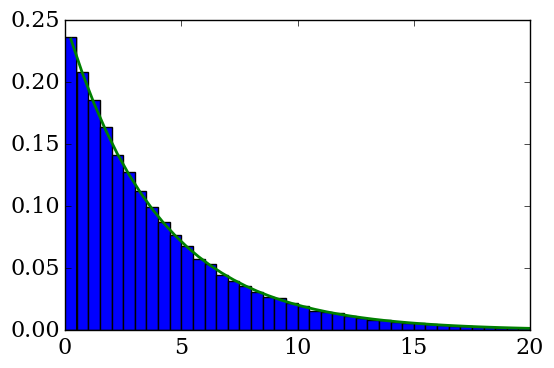

In [7]:
x = numpy.zeros(n)          

for i in range(n):         
    t = random.randint(0,n-1) # n-1 et pas n sinon on risque de tomber sur log(0) dans la formule d'après
    x[i] = t
    
y = -1/alpha*numpy.log(1-x/n) # La renormalisation est faite en dehors de la boucle for pour limiter les étapes

print(y)

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Parfait, mais pas plus efficace que les méthodes précédentes. Testons quand même encore la gaussienne.

#### Distribution gaussienne aléatoire :

De nouveau, l'algorithme est toujours le même.

Size of accepted set h and expected size 1/K: 71645 71428.57142857143


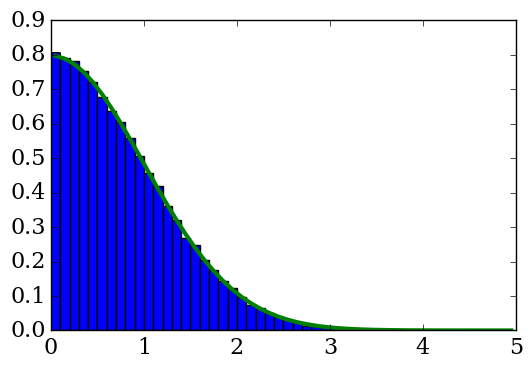

In [8]:
h=[] 

for i in range(N):
    u1 = random.randint(0,n-1)/n # Cette fois ça ne change rien de normaliser ici ou plus loin
    u2 = random.randint(0,n-1)/n
    
    g = numpy.log(1/(1-u1))
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
        
    if (u2<ratio):
        h.append(g)

print("Size of accepted set h and expected size 1/K:", len(h), N/K)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

# Challenge I (partie 2) :

On nous demande à présent d'implémenter l'algorithme de Box-Muller utilisé pour générer une distribution gaussienne. Cet algorithme permet de créer une courbe gaussienne à partir d'une distribution uniforme, que l'on sait générer facilement.

Sans entrer dans les explications de la méthode, Box-Muller dit ceci : soient $a$ et $b$ deux variables aléatoires indépendantes et uniformément distribuées sur l'intervale ]0,1], alors $A$ et $B$ sont deux variables aléatoires indépendantes et suivant une loi gaussienne de d'écart-type $\sigma = 1$ si

$$A = \sqrt{-2ln(a)} cos(2\pi b)$$

$$B = \sqrt{-2ln(a)} sin(2\pi b)$$

Vérifions cela !

In [9]:
N = 1000000 # Suffisamment grand pour voir apparaître les gaussiennes

a = numpy.random.random_sample(N) # On crée 2 tableaux de N éléments distribués uniformément entre 0 et 1
b = numpy.random.random_sample(N)

A = numpy.sqrt(-2*numpy.log(a))*numpy.cos(2*numpy.pi*b) # On applique Box-Muller
B = numpy.sqrt(-2*numpy.log(a))*numpy.sin(2*numpy.pi*b)

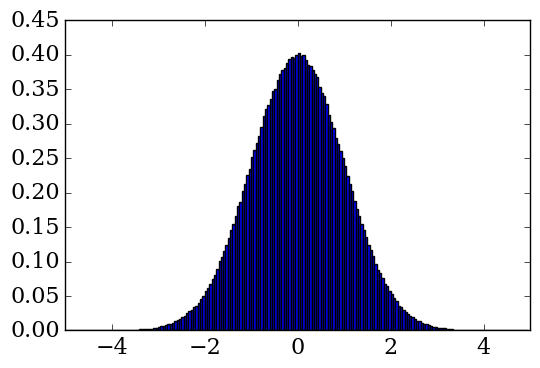

In [10]:
binwidth=.05
pyplot.xlim(-5,5)
pyplot.hist(A,bins=numpy.arange(-5,5, binwidth),normed=True);

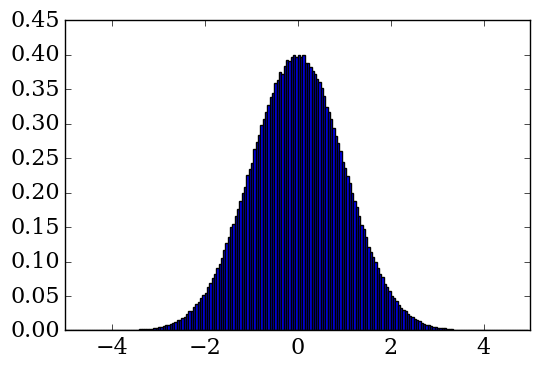

In [11]:
binwidth=.05
pyplot.xlim(-5,5)
pyplot.hist(B,bins=numpy.arange(-5,5, binwidth),normed=True);

On aurait pu se contenter d'une gaussienne mais on vient bien qu'on a réussi à créer des distributions gaussiennes à l'aide d'un algorithme extrêmement simple !


## Chalenge II :

Dans ce deuxième challenge, nous aurons besoin d'utiliser des distributions gaussiennes. Cela tombe bien, puisqu'on vient d'apprendre à les générer par la méthode de Box-Muller. Commençons donc par créer une fonction qui générera facilement cette distribution.

In [12]:
def gauss_generator(u_1,u_2): # On donne à la fonction deux tableaux d'éléments aléatoires indépendants
                              # distribués uniformément entre 0 et 1
    
    gauss = numpy.sqrt(-2*numpy.log(u_1))*numpy.cos(2*numpy.pi*u_2) # sin ou cos, peu importe
    
    return(gauss) # Elle nous renvoie des nombres tirés aléatoirement selon une loi normale centrée en 0
                  # et d'écart-type 1

Vérifions que notre fonction fonctionne correctement en la substituant dans l'exemple de trajectoire d'une seule particule (voir notebook 06_03).

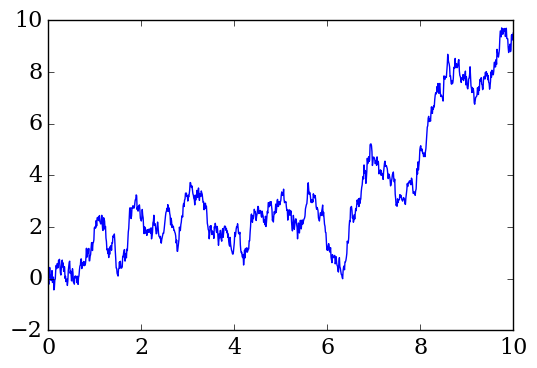

In [13]:
T=10.0

nt=1000
dt=T/nt

alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

for i in range(nt):
    
    u_1 = numpy.random.random_sample()
    u_2 = numpy.random.random_sample()
    x[i+1]=x[i]+alpha*numpy.sqrt(dt)*gauss_generator(u_1,u_2)

pyplot.plot(t,x)

C'est bon !

### Partie 1

A présent, on nous demande d'analyser la marche aléatoire de particules dont le déplacement est soumis à une contribution constante $cdt$ de sorte que 

$$dx = cdt + \sqrt{2\alpha dt}\cal{N(0,1)}$$

(où la valeur de $c$ est arbitraire mais constante et où l'on garde $\alpha = 2$). 

Commençons par une seule particule initialement à la position 0.

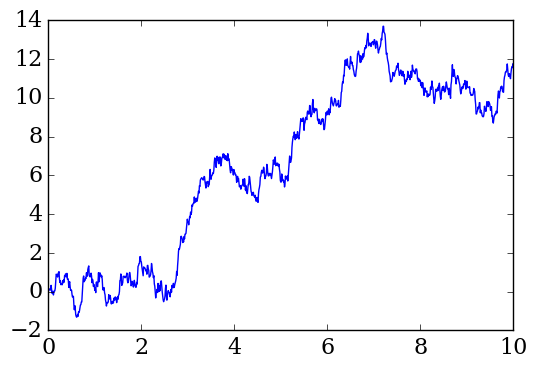

In [14]:
# T, nt, dt, t, x, x[0] et alpha sont déjà définis plus haut

c = 2 # c est arbitraire mais on constate qu'une trop grande valeur de cdt annihile presque l'effet de marche 
      # aléatoire, donc on prend c assez faible

for i in range(nt):
    
    u_1 = numpy.random.random_sample()
    u_2 = numpy.random.random_sample()
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*gauss_generator(u_1,u_2) # On rajoute la contribution constante

pyplot.plot(t,x)

Attaquons-nous à présent à un paquet de 100 000 particules. Il nous faut d'abord implémenter les conditions initiales (identiques à l'exemple). C'est-à-dire 100 000 particules centrées en 0 et réparties selon une loi normale d'écart-type $\sigma = 1$.

In [15]:
npart=100000

v_1 = numpy.random.random_sample(npart) # On change chaque fois de nom pour les distributions uniformes mais ça
v_2 = numpy.random.random_sample(npart) # n'a aucune importance
x0 = gauss_generator(v_1,v_2)

Tout comme dans le notebook, vérifions que les trajectoires de 20 particules parmi les 100 000 ressemblent à celle de notre particule unique précédente, tout en étant un peu différentes l'une de l'autre étant donné la partie aléatoire du déplacement.

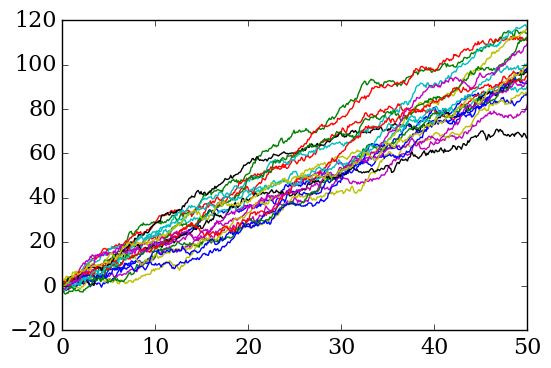

In [16]:
T=50.0 # Données arbitraires empruntées au notebook
nt=500
dt=T/nt

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    
    v_3 = numpy.random.random_sample(npart)
    v_4 = numpy.random.random_sample(npart)
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*gauss_generator(v_3,v_4)

for i in range(20):
    pyplot.plot(t,x[:,i])

C'est parfait !

Il nous reste à vérifier que la distribution finale des positions des particules correspond à ce que nous calculons analytiquement pour une diffusion avec contribution constante dans une direction.

Dans le cas où le déplacement était $dx = \sqrt{2\alpha dt}\cal{N(0,1)}$ avec la condition initiale 

$$ \rho (x,0) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{x^2}{2\sigma^2}}$$

on trouvait qu'au final la distribution à l'instant t devait être 

$$ \rho (x,t) = \frac{1}{\sqrt{2\pi\sigma_t^2}}e^{\frac{x^2}{2\sigma_t^2}}$$

avec $\sigma_t^2 = \sigma^2 + 2\alpha t$ (et $\mu$ était systématiquement nul car $\mu(x=0,t=0) = 0$ et $dx=0$ lorsqu'on remplace $\cal{N(0,1)}$ par sa moyenne).

La seule différence dans ce nouveau cas est qu'on ajoute le terme $cdt$ à $dx$ qui ne dépend pas d'un processus aléatoire. Ainsi, la moyenne de la densité de particules ne peut plus rester nulle mais augmente de $cdt$ à chaque step $nt$. Autrement dit, $\mu(x,t) = cdt * nt = cT$. 

On suppose enfin que la variance $\sigma_t^2$ reste inchangée par rapport au cas présenté dans le notebook. On peut donc vérifier si notre distribution finale obtenue précédemment correspond bien à la courbe d'équation 

$$ \rho (x,t) = \frac{1}{\sqrt{2\pi(\sigma^2+2\alpha t)}}e^{\frac{(x-cT)^2}{2(\sigma^2+2\alpha t)}}$$

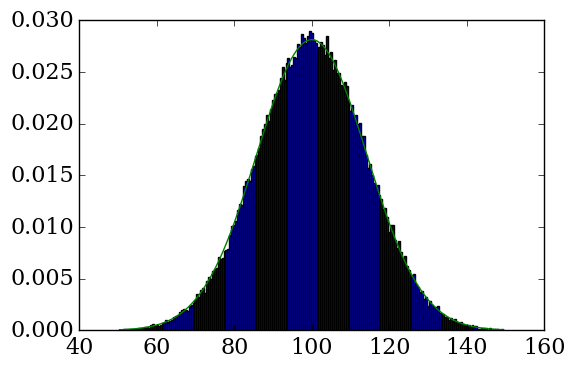

In [17]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(50,150,binwidth) # cT = 100 donc on prévoit de centrer le graphique en x = 100
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+1
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))


Cela fonctionne, donc notre solution analytique est probablement correcte.

### Partie 2 :

Il nous est à présent demandé de simuler une marche aléatoire soumise à une friction et dont le déplacement peut être modélisé par l'équation 

$$dx = -\gamma xdt + \sqrt{2\alpha dt}\cal{N(0,1)}$$

Faisons ça rapidement avec un exemple graphique pour 10 particules. Notons que notre position initiale ne sera pas centrée en 0 afin de constater la stabilisation après un temps suffisamment grand.

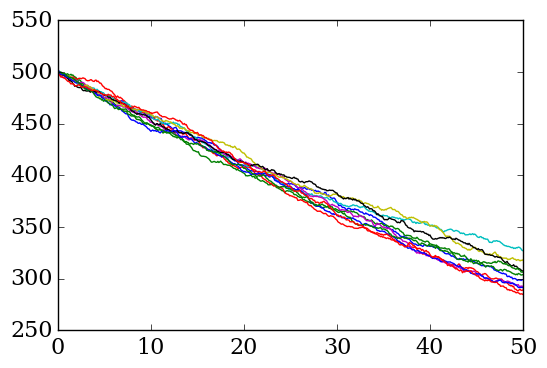

In [18]:
w_1 = numpy.random.random_sample(npart)
w_2 = numpy.random.random_sample(npart)

x00 = gauss_generator(w_1,w_2) + 500 # Les particules suivent initialemment une loi normale d'écart-type 1 et de
                                   # moyenne 500

T=50
nt=500
dt=T/nt

gamma = 0.01 # gamma est arbitraire, mais pour que la stabilisation ne se fasse pas trop vite, on le prend petit 
    
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x00

for i in range(nt):
    
    w_3 = numpy.random.random_sample(npart)
    w_4 = numpy.random.random_sample(npart)
    x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*gauss_generator(w_3,w_4)

for i in range(10):
    pyplot.plot(t,x[:,i])

Ce qui est loin d'être stationnaire. Augmentons grandement T pour voir si on a effectivement une stabilisation pour $t \rightarrow +\infty$. 

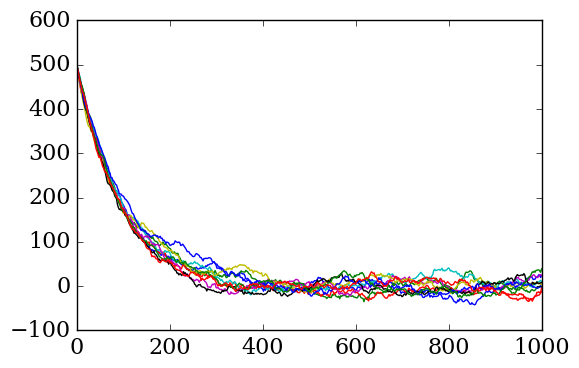

In [19]:
gamma = 0.01

T = 1000
nt = 500
dt = T/nt    
    
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x00 # On reprend la même distribution initiale que dans l'essai précédent

for i in range(nt):
    
    w_3 = numpy.random.random_sample(npart)
    w_4 = numpy.random.random_sample(npart)
    x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*gauss_generator(w_3,w_4)

for i in range(10):
    pyplot.plot(t,x[:,i])

Vérifions après ce que donne la distribution finale des 100 000 particules et si on peut lui associer une fonction analytique prédite à l'avance, cette fois de moyenne $\mu = 0$ et toujours avec la même variance.



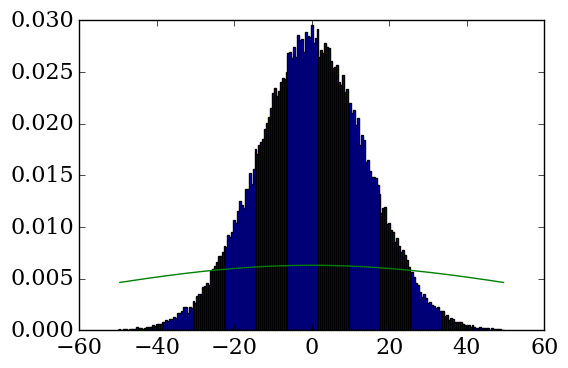

In [20]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-50,50,binwidth) # Les particules fluctuent autour de 0 donc on centre le graphique en 0
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+1
pyplot.plot(bin_centers, numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))



Ca ne fonctionne pas, la variance doit donc être modifiée. Nous n'avons pas trouvé de solution à ce problème.

Plus intéressant pour se convaincre de la stabilisation autour de 0, nous partons ici avec une distribution uniforme entre -100 et 100. encore une fois on observe la stabilisation pour $t \rightarrow +\infty$.

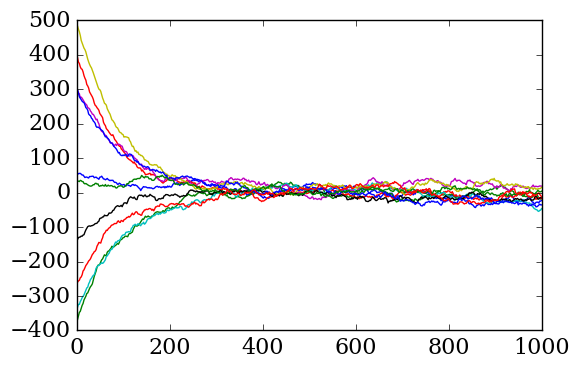

In [21]:
h_1 = numpy.random.random_sample(npart)


x00 = (h_1-0.5)*1000 # -0,5 afin d'être centré en 0

gamma = 0.01

T = 1000
nt = 500
dt = T/nt    
    
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x00

for i in range(nt):
    
    w_3 = numpy.random.random_sample(npart)
    w_4 = numpy.random.random_sample(npart)
    x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*gauss_generator(w_3,w_4)

for i in range(10):
    pyplot.plot(t,x[:,i])

On voit que la distribution se centre spontanément en 0 pour des grandes valeurs de T. C'est tout à fait normal puisque le terme $-\gamma xdt$ "force" les particules à se ramener vers x = 0.

## Challenge III

Ici nous nous intéresserons au modèle Ising étudiant le ferromagnétisme, utile dans le cadre de l'étude des transitions de phase.

Effectivement au delà d'une certaine température appellée température de Curie, les matériaux ferromagnétiques ne sont plus capables d'émettre un champ magnétique non nul en l'abscence de champ externe et c'est cette transition dans laquelle nous intéressons pour la suite.

Nous considérons ici les matériaux comme un tableau d'aimants unitaires dont le spin peut pointer vers le bas ou vers le haut.

Nous ne nous étalerons pas ici sur les différents aspects théoriques de ce sujet tenant de la physique statistique dejà eplicités en profondeur dans le notebook, néanmoin nous nous permettront de rappeler que pour un tel matériaux, l'énergie moyenne et respectivement la magnétisation moyenne seront donnéés par
$$<E>=\frac{\sum_X E_Xe^{-\beta E_X}}{Z}$$
$$<M>=\frac{\sum_X M_Xe^{-\beta E_X}}{Z}$$
Où l'indice $X$ correspond à une configuration possible du système.

### partie 1

La première partie de ce challenge sert a vérifier le bienfondé de l'algorithme de Metropolis présenté dans le notebook.

Pour ce faire, prenant un ferromagnétique représenté par une grille 10x10, nous définissons deux fonctions, la première donnant (étant donné une grille, un valeur de la constante de couplage $\alpha=\frac{J}{k_BT}$ et $\sigma=1$ ou $-1$ en fonction de la direction du spin a la position $(ix,iy)$, respectivement up ou down) l'énergie correspondante au site $(ix,iy)$

L'autre fonction applique l'algorithme de métropolis à cette cellule, tournant le spin de la position $(ix,iy)$ si la condition de probabilité est respectée.

In [22]:
nx = 10
ny = 10

def energy_at_site(sp,alpha,sigma,ix,iy):
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy



def metropolis_at_site(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    Deltae=0 ###
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Or nous savons que la probabilité relative d'avoir le spin down par rapport au spin up a une valeur numérique de 1,49. Dans le notebook nous avons déjà un exemple reproduisant cette valeur par l'algorithme de Métropolis. Le but de cette partie est de vérifier que celle-ci est bien retrouvée pour différentes configurations initiales, créées par la fonction suivante

In [23]:
def initial_state1(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

Ensuite nous reprenons le code présenté dans le notebook nous rendant la valeur numérique de ce rapport

In [24]:
def ratio(sp,alpha):
    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[5,5]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    ratio=ups/downs
    return  ratio

Et testons le raisonnement pour 10 configurations différentes.

In [25]:
for i in range(10):
    rapport=ratio(initial_state1(nx,ny),0.1)
    print(rapport)

1.0
0.6725764367431591
1.0
2.2189531964205242
1.4871291068719377
1.0
0.6690589845445138
0.6708158593841372
1.0
1.0


Nous voyons ici des valeurs qui ne tombent qu'avec une certaine précision autour de la valeur attendue. Effectivement, une seule s'approche significativement du 1,49 espéré.

### partie 2

Dans cette partie nous testerons l'algorithme présenté dans le notebook pour différentes valeurs de la constante de couplage, dans le but d'observer l'effet de son changement sur l'énergie et la magnétisation moyenne. Commençons par importer les packages utiles

In [26]:
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

Encore une fois nous testerons le raisonnement sur une grille $10x10$.

In [27]:
nx = 10
ny = 10
NMC=100 
sp = numpy.ones([nx,ny])

Pour ce challenge nous aurons besoin de tester plusieurs valeurs de $\alpha\in[0,1]$ et nous créons donc dans cette optique un tableau contenant 50 valeurs de $\alpha$ avec écart régulier.

In [28]:
alpha=numpy.linspace(0,1,50)

Aussi pour chaque valeur de alpha, nous calculerons l'énergie et la magnétisation moyenne correspondant a chacune de ces valeurs. nous pouvons donc déjà créer deux tableaux, l'un pour les valeurs d'énergie et l'autre pour les valeurs de magnétisation (moyennes).

In [29]:
Mmoy=numpy.empty_like(alpha)
Emoy=numpy.empty_like(alpha)

Ensuite nous importons ces deux fonction présentées dans le notebook qui restent valides pour notre analyse

In [30]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy



def metropolis_at_site(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    Deltae=0 ###
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Ensuite nous importons la fonction qui nous renverra NMC configurations par l'algorithme de metropolis, que nous modifions pour qu'elle nous renvoit pour chaque valeur de alpha la magnétisation et l'énergie moyenne.

In [31]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    mmoy=0 #Ces deux variables contiendront la magn et l'en moyenne calculée sur toutes les config pour un certain alpha
    emoy=0
    m=numpy.empty(NMC)    #Ces deux variables contiendront la magn et l'en moyenne pour chaques config
    e=numpy.zeros(NMC)              
 
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
        m[i-1]=sum(sum(sp))
   
        for k in range (nx):
            for l in range (ny):
                e[i-1]=e[i-1]+energy_at_site(sp,alpha,sp[k,l],k,l)
   
    mmoy=sum(m)/NMC
    emoy=sum(e)/NMC
    return  mmoy, emoy

Ainsi nous pouvons a présent remplir les tableaux précédemment crées avec les valeurs de magnétisation et d'énergie moyenne pour chaque $\alpha$

In [32]:
for i in range (0,50):
    Mmoy[i], Emoy[i]=ising_model_metropolis(sp, NMC, nx, ny, alpha[i])

Et ci-joint les graphiques respectivement de la magnétisation et de l'énegie (moyennes) en fonction de $\alpha$

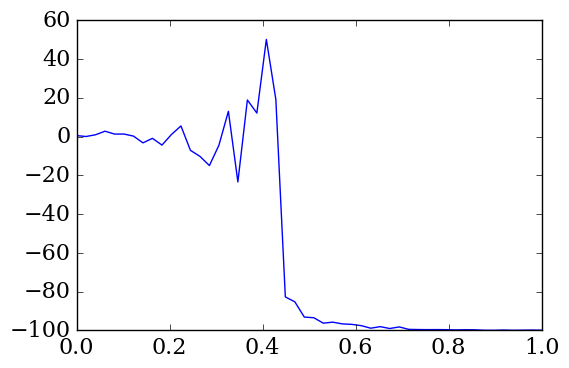

In [33]:
pyplot.plot(alpha,Mmoy)

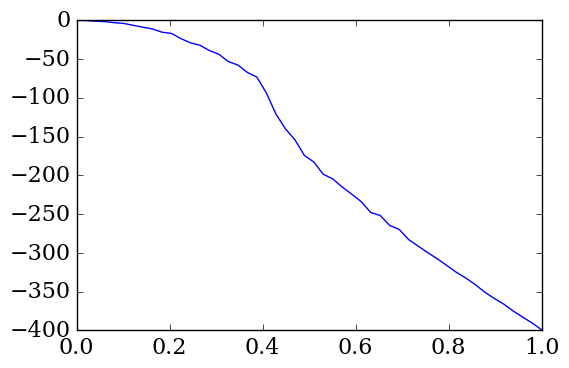

In [34]:
pyplot.plot(alpha,Emoy)

Le premier graphique nous montre bien ce que l'on espérait observer : à partir d'une certaine valeur de alpha et donc de $T_c$,la magnétisation tombe à 0 pour tout $T>T_c$. La valeur de $\alpha$ critique se situant entre 0.40 et 0.45, celle-ci correspond avec une bonne précision, après concertations avec nos collègue, à la solution analytique de Onsager vallant 0.44.

On observe sur le graphique de l'énergie une même valeur critique pour $\alpha$. Aussi une transition de phase est clairement observée sur ce graphe : au delà de $\alpha$ critique, la relation entre l'énergie moyenne et $\alpha$ devient linéaire.

### Partie 3

Créons a présent une fonction qui nous donnera un état initial avec des spins aléatoirement orientés dans le domaine et pointant vers le haut sur les bords: 

In [35]:
def initial_state(nx,ny):
    r = numpy.random.randint(0,2,(nx,ny))
    r[r==0] =-1
    for i in range (nx):
        r[i,0]=1
        r[i,ny-1]=1
    for j in range (nx):
        r[0,j]=1
        r[ny-1,j]=1    
        
    return r

In [36]:
r=initial_state(nx,ny)

In [37]:
r

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1, -1, -1,  1, -1,  1,  1],
       [ 1, -1, -1, -1,  1,  1,  1,  1, -1,  1],
       [ 1, -1, -1,  1,  1,  1,  1, -1, -1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1, -1,  1, -1,  1,  1],
       [ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1],
       [ 1, -1, -1, -1,  1, -1,  1, -1,  1,  1],
       [ 1,  1, -1, -1,  1, -1,  1, -1, -1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

Et appliquons le même raisonnement

In [38]:
for i in range (0,50):
    Mmoy[i], Emoy[i]=ising_model_metropolis(r, NMC, nx, ny, alpha[i])

Et ci-joint les graphiques respectivement de la magnétisation et de l'énegie (moyennes) en fonction de $\alpha$

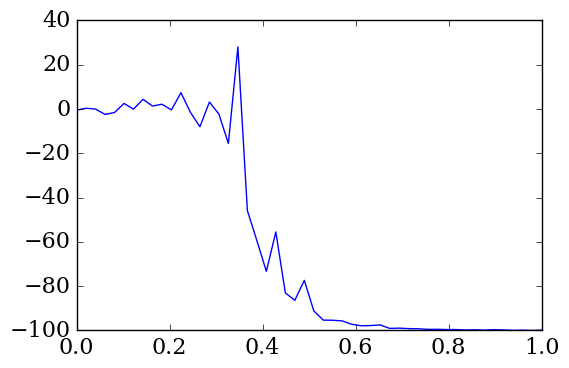

In [39]:
pyplot.plot(alpha,Mmoy)

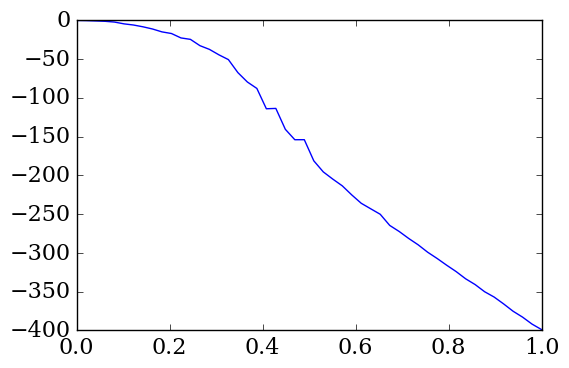

In [40]:
pyplot.plot(alpha,Emoy)

Les graphes observés sont bien sûr différents des précédents mais leur comportement est similaire : on observe toujours une valeur critique pour $\alpha$ se rapprochant de celle prévue et les transitions de phase sont clairement observées.

Après ces différents test nous pouvons affirmer le bienfondé du modèle Ising, vérifié pour différentes conditions initiales et correspondant aux phénomènes observés au laboratoire.